In [1]:
import desimodel.focalplane
import desitarget.io
import fitsio
import numpy as np
import desimodel.io
import desimodel.footprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sweep_root = "/project/projectdirs/cosmo/data/legacysurvey/dr5/sweep/5.0/"

In [3]:
sweep_files = desitarget.io.list_sweepfiles(sweep_root)

In [4]:
len(sweep_files)

303

In [5]:
sweep_files[0]

'/project/projectdirs/cosmo/data/legacysurvey/dr5/sweep/5.0/sweep-320m015-330m010.fits'

In [6]:
sweep_data = []
for i in range(10):
    sweep_file = sweep_files[i]
    sweep_data.append(fitsio.read(sweep_file, columns=['RA', 'DEC', 'FLUX_R']))

In [7]:
len(sweep_data)

10

17269341


(15, 20)

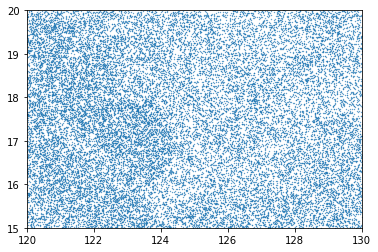

In [40]:
all_sweep = np.concatenate(sweep_data, axis=0)
print(len(all_sweep))
r = np.random.random(len(all_sweep))
ii = r<0.01
plt.scatter(all_sweep['RA'][ii], all_sweep['DEC'][ii], s=0.1)
plt.xlim([120,130])
plt.ylim([15,20])

In [41]:
#plt.scatter(all_sweep['RA'][:100], all_sweep['DEC'][:100])
desi_tiles = desimodel.io.load_tiles()

ii = (desi_tiles['DEC']>15)  & (desi_tiles['DEC']<20.0) & (desi_tiles['RA']>120) & (desi_tiles['RA']<130) & (desi_tiles['PASS']==1)
desi_tiles = desi_tiles[ii]

8


FITS_rec([ (5904, 122.80000000000001, 17.989999999999998, 1, 1, 0.042923268, 1.060528, 3638.0581, 1.3974077, 'DARK', 1)], 
      dtype=(numpy.record, [('TILEID', '>i4'), ('RA', '>f8'), ('DEC', '>f8'), ('PASS', '>i2'), ('IN_DESI', '>i2'), ('EBV_MED', '>f4'), ('AIRMASS', '>f4'), ('STAR_DENSITY', '>f4'), ('EXPOSEFAC', '>f4'), ('PROGRAM', 'S6'), ('OBSCONDITIONS', '>i4')]))

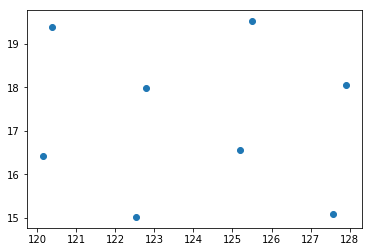

In [42]:
print(len(desi_tiles))
plt.scatter(desi_tiles['RA'], desi_tiles['DEC'])
desi_tiles[:1]

In [48]:
all_targetindices = dict()
for tile_id in desi_tiles['TILEID']:
    ii = desi_tiles['TILEID'] ==tile_id
    print(tile_id, desi_tiles['RA'][ii], desi_tiles['DEC'][ii])
    targetindices, gfaindices = desimodel.focalplane.on_tile_gfa(tile_id, all_sweep)
    all_targetindices[tile_id] = targetindices
    print(tile_id, len(targetindices))

5904 [ 122.8] [ 17.99]
5904 13467
6585 [ 120.37] [ 19.39]
6585 4336
6606 [ 120.14] [ 16.41]
6606 5660
9552 [ 122.54] [ 15.01]
9552 6330
11050 [ 125.2] [ 16.55]
11050 11622
11051 [ 127.56] [ 15.09]
11051 6041
11070 [ 127.91] [ 18.06]
11070 9299
11071 [ 125.51] [ 19.53]
11071 5898


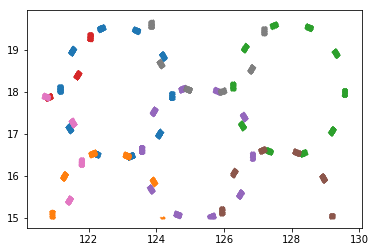

In [49]:
for k in all_targetindices.keys():
    tt = all_targetindices[k]
    plt.scatter(all_sweep['RA'][tt], all_sweep['DEC'][tt], s=0.1)

In [51]:
for k in all_targetindices.keys():
    tt = all_targetindices[k]
    filename = "gfa_targets_tile_{:05d}.fits".format(k)
    print(filename)
    a = fitsio.write(filename, all_sweep[tt])
#a = Table.read("GFA_targets.fits")

gfa_targets_tile_05904.fits
gfa_targets_tile_09552.fits
gfa_targets_tile_11070.fits
gfa_targets_tile_06585.fits
gfa_targets_tile_11050.fits
gfa_targets_tile_11051.fits
gfa_targets_tile_06606.fits
gfa_targets_tile_11071.fits


In [53]:
a = fitsio.read(filename)
a

array([(123.89728522449803, 19.512488759820144, 5.536398887634277),
       (123.90016616983694, 19.522784608116194, 1.3381279706954956),
       (123.89775442463294, 19.513845901430845, -0.026809856295585632),
       ..., (127.12837556410784, 19.519039392149924, 0.2712293863296509),
       (127.1211043864371, 19.530934686950577, 0.49035704135894775),
       (127.11927307442986, 19.533187700431704, 2.456599712371826)], 
      dtype=[('RA', '>f8'), ('DEC', '>f8'), ('FLUX_R', '>f4')])

In [ ]:
fitsio.write()